In [2]:
import cv2
import os
import numpy as np       
import matplotlib.pyplot as plt
import glob

In [3]:
# getting Mean Subtracted Data 
# Replace the face detection file path with the file path according to where face data set is stored in your system in format 
#'filelocation/*'
path = 'C:/Users/ranji/Desktop/face/*'


In [4]:
def getMeanSubData(path):
    data = np.empty((0,10304), int)
    meanarr = np.empty((0,10304), int)
    lenght = len(path)
    for i in range(1,41): 
        folder = str(path[0:lenght-1]) +str('s') + str(i)
        #print(folder)
        files = glob.glob(str(folder) + str('/') + str('*'))
        j =0 
        for file in files: 
            if j<7: 
                img = cv2.imread(file)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                img = img.flatten()
                data = np.append(data, np.array([img]), axis=0)
            j = j+1
    data = np.transpose(data)
    mean = np.mean(data, axis = 1)
    mean = np.append(meanarr,np.array([mean]), axis=0)
    mean = np.transpose(mean)
    mean_sub_data = data - mean
    #print(mean_sub_data.shape)
    return mean_sub_data, mean 
    
getMeanSubData(path)

(array([[-37.15      , -51.15      , -25.15      , ...,  44.85      ,
          42.85      ,  37.85      ],
        [-36.17857143, -51.17857143, -25.17857143, ...,  37.82142857,
          39.82142857,  35.82142857],
        [-40.5       , -52.5       , -23.5       , ...,  41.5       ,
          39.5       ,  40.5       ],
        ...,
        [-27.72857143, -37.72857143, -42.72857143, ..., -41.72857143,
          10.27142857, -34.72857143],
        [-27.89285714, -33.89285714, -39.89285714, ..., -36.89285714,
          16.10714286, -38.89285714],
        [-27.24285714, -40.24285714, -39.24285714, ..., -33.24285714,
          10.75714286, -31.24285714]]),
 array([[85.15      ],
        [85.17857143],
        [85.5       ],
        ...,
        [74.72857143],
        [73.89285714],
        [73.24285714]]))

In [5]:
#Getting eigen vectors 

In [6]:
def k_eigen_vectors (mean_sub_data, k): 
    covarience_matrix = np.dot(np.transpose(mean_sub_data), mean_sub_data)
    eigen_vectors,v,d = np.linalg.svd(covarience_matrix)
    eigen_vectors = np.transpose(eigen_vectors )
    k_eigen_vector = eigen_vectors[0:k]
    k_eigen_vector = np.transpose(k_eigen_vector )
    return k_eigen_vector

mean_sub_data, mean = getMeanSubData(path)
k_eigen_vectors (mean_sub_data, 50)



array([[-0.05242567,  0.04850929, -0.10318429, ..., -0.01551674,
         0.07758203, -0.03769107],
       [-0.09263608,  0.04269897, -0.060034  , ...,  0.11512273,
        -0.04651512, -0.01486918],
       [-0.1031415 ,  0.03133874,  0.02435951, ...,  0.07898323,
         0.0500002 ,  0.10586431],
       ...,
       [-0.01765535,  0.00182342,  0.12848587, ...,  0.09116386,
        -0.02317898, -0.05128706],
       [-0.03959338,  0.06872157,  0.05303724, ...,  0.04310801,
         0.01019105,  0.02010629],
       [-0.01971575,  0.04544273,  0.09502669, ...,  0.03066523,
        -0.04526188,  0.06851649]])

In [7]:
#eigen faces 

In [8]:
def eigen_faces (mean_sub_data, k_eigen_vectors):
    eigen_face = np.dot(np.transpose(k_eigen_vectors), np.transpose(mean_sub_data)) 
    return eigen_face

mean_sub_data, mean = getMeanSubData(path)
k_eigen_vector = k_eigen_vectors (mean_sub_data, 50)
eigen_face = eigen_faces (mean_sub_data, k_eigen_vector)
print(eigen_face.shape)


(50, 10304)


In [9]:
#signature face matrix 

In [10]:
def sig_face_matrix (eigen_face, meansubmatrix): 
    sigfacematrix = np.dot(eigen_face, meansubmatrix)
    #print(sigfacematrix.shape)
    return sigfacematrix

mean_sub_data, mean = getMeanSubData(path)
k_eigen_vector = k_eigen_vectors (mean_sub_data, 50)
eigen_face = eigen_faces (mean_sub_data, k_eigen_vector)
sigface = sig_face_matrix(eigen_face, mean_sub_data)


In [11]:
#getting test mean sub matrix

In [12]:
def accuracy(path, k):
    mean_sub_data, mean = getMeanSubData(str(path))
    k_eigen_vector = k_eigen_vectors (mean_sub_data, k)
    eigen_face = eigen_faces (mean_sub_data, k_eigen_vector)
    sigface = sig_face_matrix(eigen_face, mean_sub_data)
    sigface = np.transpose(sigface)
    count = 0
    max_values =[]
    for i in range(1,41): 
        folder = 'C:/Users/ranji/Desktop/face\\s' + str(i)
        files = glob.glob(str(folder) + str('/') + str('*'))
        j =0 
        for file in files: 
            if j>=7: 
                data = np.empty((0,10304), int)
                img = cv2.imread(file)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                img = img.flatten()
                data = np.append(data, np.array([img]), axis=0)
                data = np.transpose(data)
                data = data - mean 
                sig_face_test = np.dot(eigen_face, data) 
                sig_face_test = np.transpose(sig_face_test)
                norm = []
                for k in range(280): 
                    normele = np.linalg.norm(sig_face_test[0] - sigface[k])
                    norm.append(normele)
                #print(norm)
                min_pos = norm.index(min(norm))
                max_vale = max(norm)
                max_values.append(max_vale)
                res = min_pos in range(7*(i-1), 7*i)
                if (res): 
                    count = count +1
            j = j+1
    print((count/120)*100)
    return ((count/120)*100)
    
accuracy('C:/Users/ranji/Desktop/face/*', 50)

90.83333333333333


90.83333333333333

In [13]:
#getting accuracy plot 

accuracy for k = 1 is:
6.666666666666667
accuracy for k = 2 is:
32.5
accuracy for k = 3 is:
62.5
accuracy for k = 4 is:
70.0
accuracy for k = 5 is:
75.0
accuracy for k = 6 is:
81.66666666666667
accuracy for k = 7 is:
85.0
accuracy for k = 8 is:
88.33333333333333
accuracy for k = 9 is:
87.5
accuracy for k = 10 is:
89.16666666666667
accuracy for k = 11 is:
90.0
accuracy for k = 12 is:
89.16666666666667
accuracy for k = 13 is:
89.16666666666667
accuracy for k = 14 is:
89.16666666666667


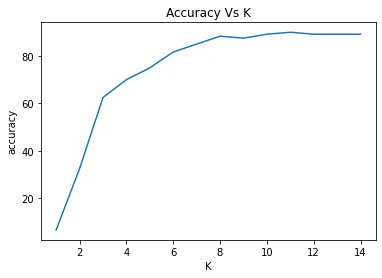

In [14]:
import matplotlib.pyplot as plt
lis = []

for k in range(1, 15): 
    print('accuracy for k = ' + str(k) + ' is:')
    lis.append(accuracy('C:/Users/ranji/Desktop/face/*', k))
    

plt.xlabel('K')
plt.ylabel('accuracy')
plt.title('Accuracy Vs K')

plt.plot(range(1,15), lis)


In [15]:
#imposter detection

In [16]:
import random

def imposters(path, k, n):
    mean_sub_data, mean = getMeanSubData(str(path))
    k_eigen_vector = k_eigen_vectors (mean_sub_data, k)
    eigen_face = eigen_faces (mean_sub_data, k_eigen_vector)
    sigface = sig_face_matrix(eigen_face, mean_sub_data)
    sigface = np.transpose(sigface)
    for i in range(n):
        randomlist = []
        data = np.empty((0,10304), int)
        for j in range(10304):
            n = random.randint(-4,4)
            randomlist.append(n)
        data = np.append(data, np.array([randomlist]), axis=0)
        data = np.transpose(data)
        sig_face_test = np.dot(eigen_face, data) 
        sig_face_test = np.transpose(sig_face_test)
        norm = []
        for k in range(280): 
            normele = np.linalg.norm(sig_face_test[0] - sigface[k])
            norm.append(normele)
        #print(min(norm))
        
        if min(norm) > 18919418:
            print('test image ' + str(i) + ' is imposter')
        else: 
            print('test image ' + str(i) + ' is not imposter')
        
    
imposters(path, 50, 10)
    
    
        


test image 0 is imposter
test image 1 is imposter
test image 2 is imposter
test image 3 is imposter
test image 4 is imposter
test image 5 is imposter
test image 6 is imposter
test image 7 is imposter
test image 8 is imposter
test image 9 is imposter
